## Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CSI

In [8]:
def merge_csv_files_from_folders(folder_list):
  """
  Merges CSV files from a list of folders based on a label extracted from the filenames.

  Args:
      folder_list (list): A list of folder paths containing CSV files.

  Returns:
      pd.DataFrame: The merged DataFrame containing data from all folders.
  """

  all_dfs = []

  for folder_path in folder_list:
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    for file_name in file_list:
      match = re.search(r"(\d+)_persons", file_name)
      if match:
        label = int(match.group(1))
        file_path = os.path.join(folder_path, file_name)
        print(file_path)
        print("Label: ",label)
        df = pd.read_csv(file_path)
        df["label"] = label
        all_dfs.append(df)

  merged_df = pd.concat(all_dfs, ignore_index=True)  # Combine all DataFrames

  return merged_df

### 28/09/2024

In [9]:
folder_list = [
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session_1',
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session_2',
    # Add more folder paths here
]

merged_df = merge_csv_files_from_folders(folder_list)

print("Merged DataFrame:")
print(merged_df.shape)  # Display the first few rows

/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/5_persons.csv
Label:  5
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/4_persons.csv
Label:  4
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/3_persons.csv
Label:  3
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/2_persons.csv
Label:  2
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/1_persons.csv
Label:  1
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session01/0_persons.csv
Label:  0
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session02/5_persons_hidden.csv
Label:  5
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/CSI_Packets/session02/4_persons_cont.csv
Label:  4
/content/drive/MyDrive/UIT/U

In [18]:
# Count occurrences of each label
label_counts = merged_df["label"].value_counts()

print(label_counts)

label
0    33701
1    32469
2    32222
4    31301
3    31025
5    29941
Name: count, dtype: int64


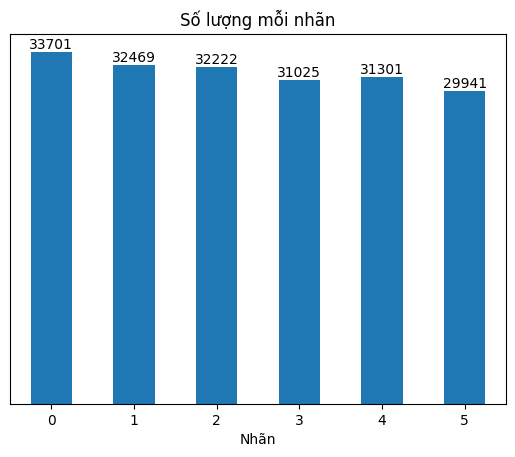

In [46]:
# Group the DataFrame by the "label" column and count the occurrences
label_counts_1 = merged_df.groupby("label").size()

# Sort the Series by the label names
label_counts_1 = label_counts_1.sort_index()

# Draw the bar chart
label_counts_1.plot(kind='bar',rot=360)
plt.title('Số lượng mỗi nhãn')
plt.xlabel('Nhãn')
plt.yticks([])

for i, (label, count) in enumerate(label_counts_1.items()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

### 05/10/2024

In [12]:
folder_list = [
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1',
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_2',
    # Add more folder paths here
]

merged_df_2 = merge_csv_files_from_folders(folder_list)

print("Merged DataFrame:")
print(merged_df_2.shape)  # Display the first few rows

/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/5_persons.csv
Label:  5
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/4_persons.csv
Label:  4
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/3_persons.csv
Label:  3
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/2_persons.csv
Label:  2
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/1_persons.csv
Label:  1
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_1/0_persons.csv
Label:  0
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_2/5_persons.csv
Label:  5
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/CSI_Packets/session_2/4_persons.csv
Label:  4
/content/drive/MyDrive/UIT/UIT_Graduatio

In [17]:
# Count occurrences of each label
label_counts = merged_df_2["label"].value_counts()

print(label_counts)

label
2    34541
1    34109
4    34035
5    33425
0    33265
3    32817
Name: count, dtype: int64


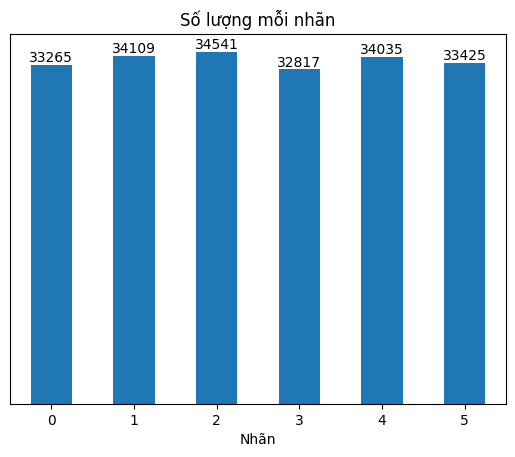

In [45]:
# Group the DataFrame by the "label" column and count the occurrences
label_counts_2 = merged_df_2.groupby("label").size()

# Sort the Series by the label names
label_counts_2 = label_counts_2.sort_index()

# Draw the bar chart
label_counts_2.plot(kind='bar',rot=360)
plt.title('Số lượng mỗi nhãn')
plt.xlabel('Nhãn')
plt.yticks([])

for i, (label, count) in enumerate(label_counts_2.items()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

### 12/10/2024

In [20]:
folder_list = [
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1',
    '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_2',
    # Add more folder paths here
]

merged_df_3 = merge_csv_files_from_folders(folder_list)

print("Merged DataFrame:")
print(merged_df_3.shape)  # Display the first few rows

/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/2_persons.csv
Label:  2
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/5_persons.csv
Label:  5
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/1_persons.csv
Label:  1
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/4_persons.csv
Label:  4
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/0_persons.csv
Label:  0
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_1/3_persons.csv
Label:  3
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_2/0_persons.csv
Label:  0
/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/CSI_Packets/session_2/2_persons.csv
Label:  2
/content/drive/MyDrive/UIT/UIT_Graduatio

In [21]:
# Count occurrences of each label
label_counts = merged_df_3["label"].value_counts()

print(label_counts)

label
4    27411
2    24984
5    24856
3    24597
0    22015
1    20993
Name: count, dtype: int64


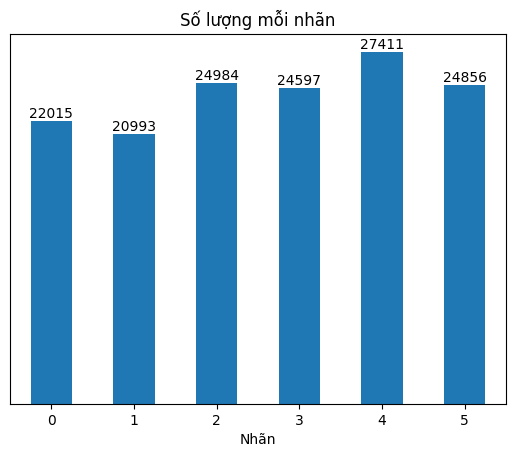

In [47]:
# Group the DataFrame by the "label" column and count the occurrences
label_counts_3 = merged_df_3.groupby("label").size()

# Sort the Series by the label names
label_counts_3 = label_counts_3.sort_index()

# Draw the bar chart
label_counts_3.plot(kind='bar',rot=360)
plt.title('Số lượng mỗi nhãn')
plt.xlabel('Nhãn')
plt.yticks([])

for i, (label, count) in enumerate(label_counts_3.items()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

### Charts

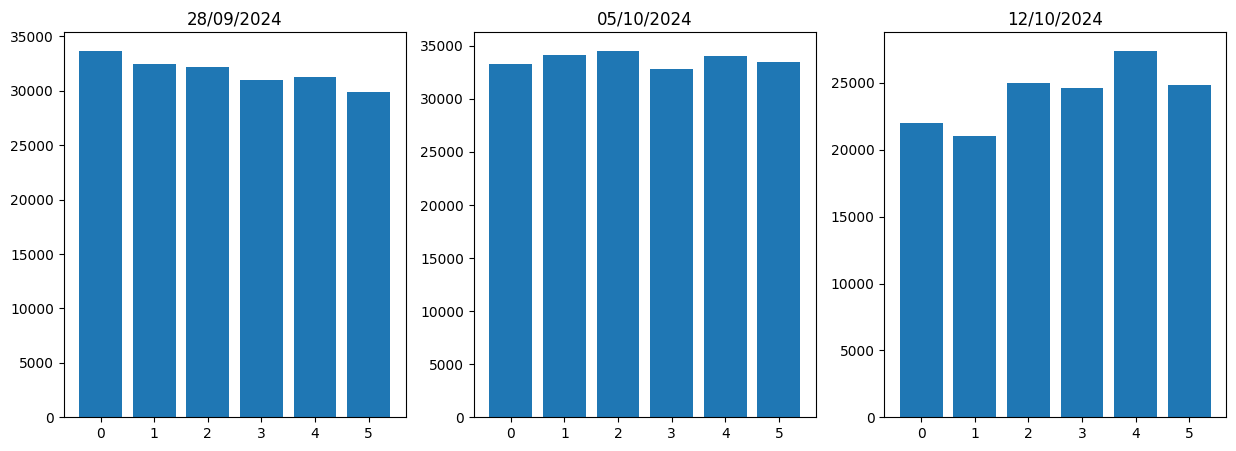

In [57]:
import matplotlib.pyplot as plt

# Assuming you have three label counts: label_count1, label_count2, label_count3

# Create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Plot data for each subplot
axes[0].bar(label_counts_1.index, label_counts_1.values)
axes[0].set_title('28/09/2024')

axes[1].bar(label_counts_2.index, label_counts_2.values)
axes[1].set_title('05/10/2024')

axes[2].bar(label_counts_3.index, label_counts_3.values)
axes[2].set_title('12/10/2024')

plt.show()

## Images

In [85]:
def create_img_df(folder_list):
  """
  Creates a DataFrame containing subfolder names and corresponding file names.

  Args:
      folder_list (list): A list of folder paths.

  Returns:
      pd.DataFrame: A DataFrame with two columns: "Subfolder" and "File".
  """

  data = []
  for folder_path in folder_list:
    for root, dirs, files in os.walk(folder_path):
      if root != folder_path:  # Exclude the main folder
        subfolder_name = (os.path.basename(root))
        match = re.search(r"(\d+)_person", subfolder_name)
        if match:
          label = int(match.group(1))
          for file in files:
            data.append([label, file])
  df = pd.DataFrame(data, columns=["Label", "File"])
  return df


### 28/09/2024

In [86]:
folder_list_1 =[
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/Image_Frames/session_1",
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-09-28/Image_Frames/session_2"
]
image_df_1 = create_img_df(folder_list_1)

print(image_df_1.head)


<bound method NDFrame.head of        Label                          File
0          1  frame_1727493842.6950152.jpg
1          1   frame_1727493842.037358.jpg
2          1  frame_1727493842.1443515.jpg
3          1  frame_1727493842.8032699.jpg
4          1  frame_1727493842.2513835.jpg
...      ...                           ...
19184      5  frame_1727494954.2877078.jpg
19185      5  frame_1727494954.5086918.jpg
19186      5    frame_1727494954.61896.jpg
19187      5  frame_1727494954.8390315.jpg
19188      5   frame_1727494955.828495.jpg

[19189 rows x 2 columns]>


In [87]:
# Count occurrences of each label
label_counts_1 = image_df_1["Label"].value_counts()

print(label_counts_1)

Label
5    3218
1    3209
3    3209
2    3202
4    3196
0    3155
Name: count, dtype: int64


### 05/10/2024

In [88]:
folder_list_2 =[
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/Image_Frames/session_1",
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-05/Image_Frames/session_2"
]
image_df_2 = create_img_df(folder_list_2)

print(image_df_2.head)


<bound method NDFrame.head of        Label                          File
0          5  frame_1728096097.8690746.jpg
1          5  frame_1728096097.9770112.jpg
2          5  frame_1728096098.0957618.jpg
3          5  frame_1728096098.2030623.jpg
4          5  frame_1728096098.3111475.jpg
...      ...                           ...
19407      0  frame_1728099793.5513422.jpg
19408      0  frame_1728099793.6589208.jpg
19409      0  frame_1728099793.7775648.jpg
19410      0   frame_1728099793.885339.jpg
19411      0  frame_1728099793.9928386.jpg

[19412 rows x 2 columns]>


In [89]:
label_counts_2 = image_df_2["Label"].value_counts()

print(label_counts_2)

Label
0    3249
3    3240
5    3238
1    3234
4    3228
2    3223
Name: count, dtype: int64


### 12/10/2024

In [90]:
folder_list_3 =[
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/Image_Frames/session_1",
    "/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/0_Raw/2024-10-12/Image_Frames/session_2"
]
image_df_3 = create_img_df(folder_list_3)

print(image_df_3.head)


<bound method NDFrame.head of        Label                          File
0          4  frame_1728702710.4181435.jpg
1          4  frame_1728702710.0933595.jpg
2          4  frame_1728702710.5253458.jpg
3          4  frame_1728702710.7407424.jpg
4          4  frame_1728702710.2030463.jpg
...      ...                           ...
19421      1   frame_1728705389.569824.jpg
19422      1  frame_1728705389.0181086.jpg
19423      1   frame_1728705390.232299.jpg
19424      1  frame_1728705390.5571306.jpg
19425      1    frame_1728705390.11369.jpg

[19426 rows x 2 columns]>


In [91]:
label_counts_3 = image_df_3["Label"].value_counts()

print(label_counts_3)

Label
1    3244
4    3243
0    3243
2    3243
5    3237
3    3216
Name: count, dtype: int64


### Charts

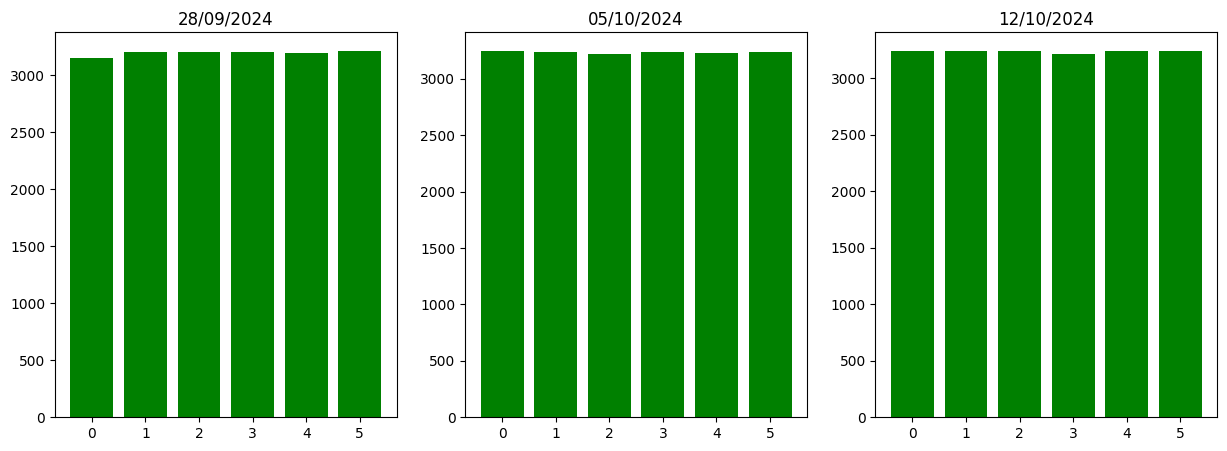

In [93]:
import matplotlib.pyplot as plt

# Assuming you have three label counts: label_count1, label_count2, label_count3

# Create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Plot data for each subplot
axes[0].bar(label_counts_1.index, label_counts_1.values, color='green')
axes[0].set_title('28/09/2024')

axes[1].bar(label_counts_2.index, label_counts_2.values, color='green')
axes[1].set_title('05/10/2024')

axes[2].bar(label_counts_3.index, label_counts_3.values, color='green')
axes[2].set_title('12/10/2024')

plt.show()